# Exercise Sheet 3 Solution (Exercise 3)

## Willy Oesterheld

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(0.0, 2167.0)

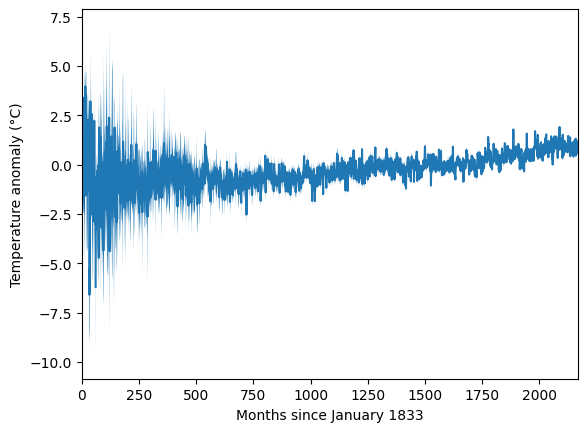

In [45]:
# read data file
path = "../../notebooks/data/BerkeleyEarth_GlobalLandTemperature.dat"
data = pd.read_table(path, comment="#", header=None, sep="\s+")
mat = data.to_numpy()

# extract relevant data
year  = mat[:,0]
temp  = mat[:,2]
err   = mat[:,3]

# plot temperature
x = range(0,temp.size)
plt.fill_between(x, temp-err, temp+err)
plt.plot(x, temp)
plt.ylabel("Temperature anomaly (°C)")
plt.xlabel("Months since January 1833")
plt.xlim(x[0], x[-1])

(1838.0, 2008.0)

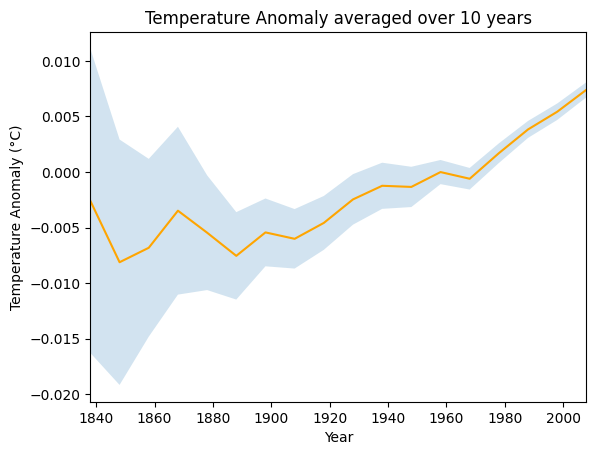

In [53]:
# calculate & apply weights
w = 1 / np.power(err, 2)
w_temp = temp * w
w_err = err * w

# remove nans
i = ~(np.isnan(w) & np.isnan(w_temp) & np.isnan(w_err))
w = w[i]
w_year = year[i]
w_temp = w_temp[i]
w_err = w_err[i]

# put data into 10-year bins
bins = np.arange(w_year[0], w_year[-1]+10, 10)

# count elements in each bin
n, y       = np.histogram(w_year, bins=bins)
# sum up temperature, errors and weights for each bin
h_temp, _  = np.histogram(w_year, bins=bins, weights=w_temp);
h_err, _   = np.histogram(w_year, bins=bins, weights=w_err);
h_w, _     = np.histogram(w_year, bins=bins, weights=w);    # this is used to ensure the weights used for the mean sum up to one

# weighted mean values per bin
w = h_w*n
h_temp = h_temp / w
h_err  = h_err  / w

# plot, use year mid points
x = (y[:-1]+y[1:])/2
plt.fill_between(x, h_temp-h_err, h_temp+h_err, alpha=0.2)
plt.plot(x, h_temp, color="orange")
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Temperature Anomaly averaged over 10 years")
plt.xlim(x[0], x[-1])